# Data Description:
#### The file Bank.xls contains data on 5000 customers. The data include customerdemographic information (age, income, etc.),
#### the customer's relationship with the bank(mortgage, securities account, etc.), and the customer response to the last personal
#### loan campaign (Personal Loan).Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
#### offered to them in the earlier campaign.

In [32]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import seaborn as sns
#import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Import the datasets 

data=pd.read_csv('C:\\Users\\User\\Desktop\\Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [34]:
#shape
print('Number of rows:', data.shape[0])
print('Number of columns:',data.shape[1])


Number of rows: 5000
Number of columns: 14


In [35]:
#Statistical summary
data.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [36]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [37]:
print("Hello")

Hello


# Check if you need to clean the data for any of the variables

In [40]:
# Replacing the negative values in the Experience column with the median value.

for i in data['Experience']:
  if(i<0):
    data['Experience'].replace(to_replace=i, value=data['Experience'].median(),limit=None, inplace=True, regex=False, method='pad')

data.describe() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Splitting the columns into categorical and continuous variables.


In [41]:
categorical = data[['Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard','Family','Education']]
continuous = data[['Age', 'Experience', 'Income','CCAvg','Mortgage','ZIP Code']]

# To check for number of unique values in each column.


In [42]:
data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# To check for number of people with zero mortgage.


In [43]:
print(data['Mortgage'].value_counts()[0])

3462


# To check for number of people with zero credit card spending per month.


In [44]:
print(data['CCAvg'].value_counts()[0])

106


# To find the value count of all categorical variables.


In [46]:
for i in categorical:
  print(i,':')
  print(categorical[i].value_counts())
  print('')

Personal Loan :
0    4520
1     480
Name: Personal Loan, dtype: int64

Securities Account :
0    4478
1     522
Name: Securities Account, dtype: int64

CD Account :
0    4698
1     302
Name: CD Account, dtype: int64

Online :
1    2984
0    2016
Name: Online, dtype: int64

CreditCard :
0    3530
1    1470
Name: CreditCard, dtype: int64

Family :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Education :
1    2096
3    1501
2    1403
Name: Education, dtype: int64



# Univariate analysis of categorical variables.



<AxesSubplot:xlabel='variable', ylabel='count'>

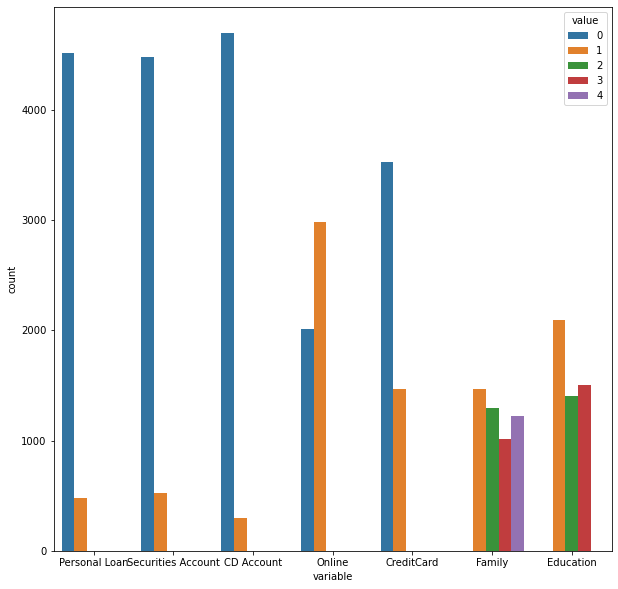

In [48]:
dframe = pd.melt(categorical)
figure(figsize=(10,10))
sns.countplot(data = dframe, x='variable', hue='value')

# Univariate analysis of continuous variables.



C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotli

Age              AxesSubplot(0.125,0.536818;0.227941x0.343182)
Experience    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Income        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
CCAvg               AxesSubplot(0.125,0.125;0.227941x0.343182)
Mortgage         AxesSubplot(0.398529,0.125;0.227941x0.343182)
ZIP Code         AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

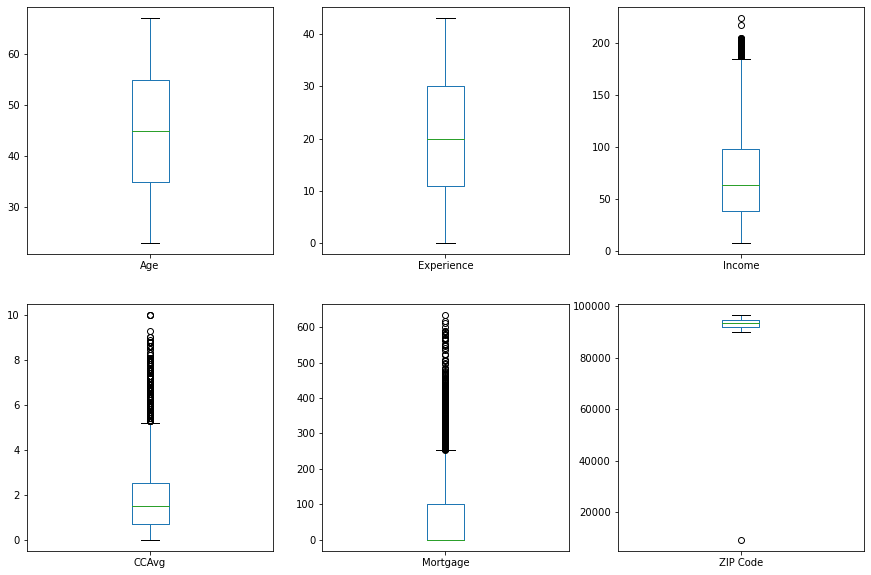

In [49]:
continuous.plot.box(subplots=True, layout = (2,3), figsize=(15,10))

# Bivariate analysis of continuous variables.



<AxesSubplot:>

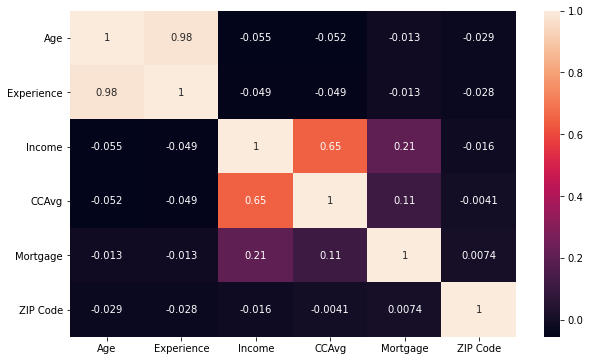

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(continuous.corr(), annot=True)

# Analysing target variable



<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

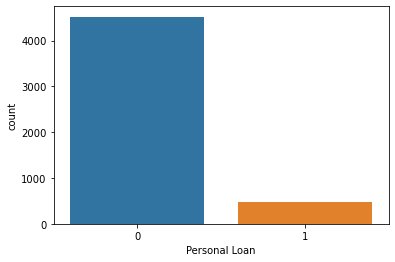

In [52]:
sns.countplot(data['Personal Loan'])

# Target variable relation with continuous variables.



C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

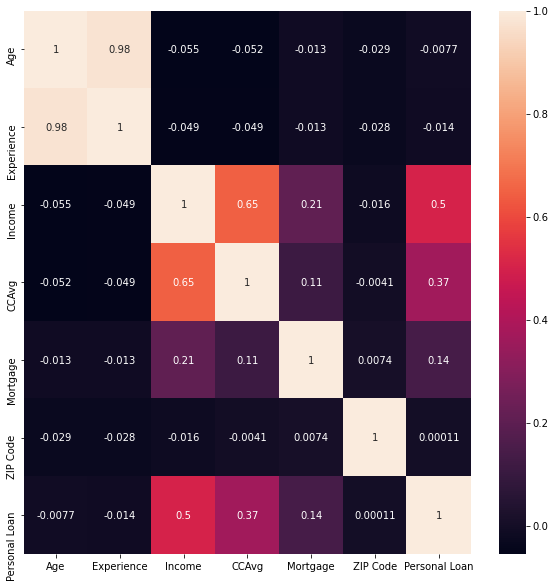

In [53]:
cont_temp = continuous
cont_temp['Personal Loan'] = data['Personal Loan']
figure(figsize=(10,10))
sns.heatmap(cont_temp.corr(), annot=True)

# Target variable relation with categorical variables.



C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

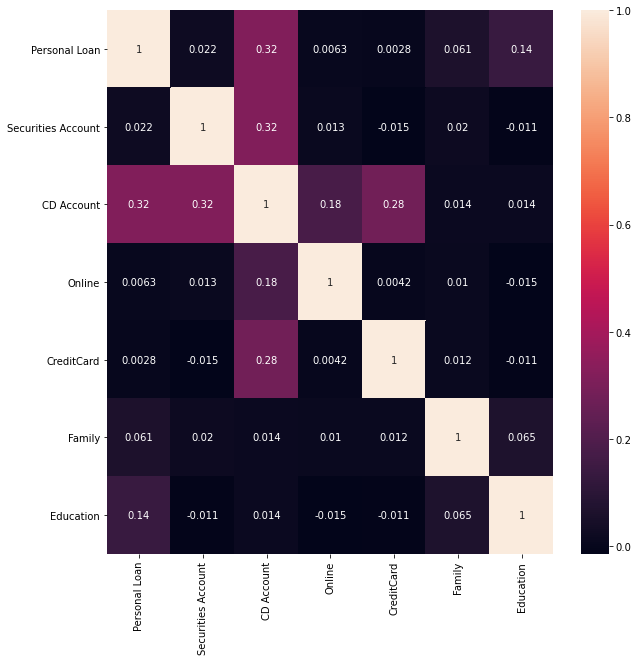

In [54]:
cat_temp = categorical
cat_temp['Personal Loan'] = data['Personal Loan']
figure(figsize=(10,10))
sns.heatmap(cat_temp.corr(), annot=True)

# Dropping columns which are not significant from the dataset.



In [55]:
data_modified = data.drop(['ID', 'Experience', 'ZIP Code', 'Securities Account', 'Online', 'CreditCard', 'Family'], axis=1)

# Applying transformation to skewed data.



<AxesSubplot:xlabel='Income'>

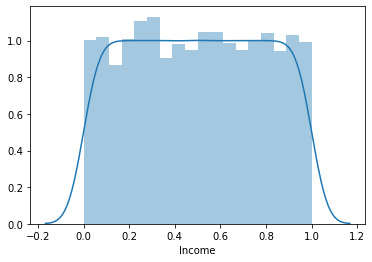

In [56]:
scaler = QuantileTransformer( )
scaler.fit(data_modified['Income'].values.reshape(-1,1))
data_modified['Income'] = scaler.fit_transform(data_modified['Income'].values.reshape(-1,1))
sns.distplot(data_modified['Income'])

<AxesSubplot:xlabel='CCAvg'>

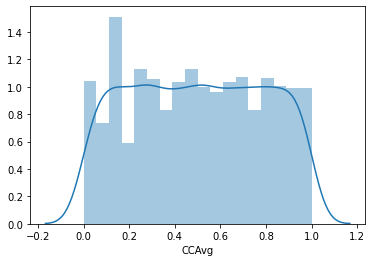

In [57]:
scaler = QuantileTransformer()
scaler.fit(data_modified['CCAvg'].values.reshape(-1,1))
data_modified['CCAvg'] = scaler.fit_transform(data_modified['CCAvg'].values.reshape(-1,1))
sns.distplot(data_modified['CCAvg'])

<AxesSubplot:xlabel='Mortgage'>

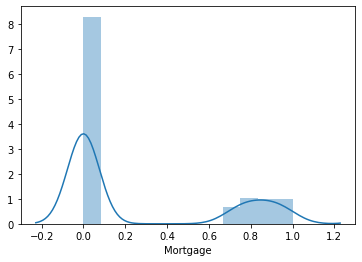

In [58]:
scaler = QuantileTransformer()
scaler.fit(data_modified['Mortgage'].values.reshape(-1,1))
data_modified['Mortgage'] = scaler.fit_transform(data_modified['Mortgage'].values.reshape(-1,1))
sns.distplot(data_modified['Mortgage'])

# Building a logistic regression model.



In [59]:
X = data_modified.drop(['Personal Loan'],axis=1)
y = data_modified['Personal Loan']

# Splitting the dataset into training and test sets as a stratified sample



In [60]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 6), (1500, 6), (3500,), (1500,))

# Fitting the model.



In [61]:
logistic_regression= LogisticRegression(random_state=2)
logistic_regression.fit(X_train,y_train)

LogisticRegression(random_state=2)

# Prediction and Performance on Test Data.



In [63]:
from sklearn.metrics import confusion_matrix
y_pred_test=logistic_regression.predict(X_test)
print('Predicted values using test data:-',y_pred_test)
print('Accuracy:-',metrics.accuracy_score(y_test, y_pred_test))
cm = confusion_matrix(y_pred_test,y_test)
print(cm)

Predicted values using test data:- [0 0 0 ... 0 0 0]
Accuracy:- 0.9526666666666667
[[1349   64]
 [   7   80]]


# Prediction and Performance on Train Data.



In [64]:
from sklearn.metrics import confusion_matrix
y_pred_train = logistic_regression.predict(X_train)
print('Predicted values using train data:-',y_pred_train)
print('Accuracy:-',metrics.accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_pred_train, y_train)
print(cm)

Predicted values using train data:- [0 0 0 ... 0 0 0]
Accuracy:- 0.9551428571428572
[[3146  139]
 [  18  197]]


In [66]:
print("Classification Report:")
print(metrics.classification_report(y_pred_test, y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1413
           1       0.56      0.92      0.69        87

    accuracy                           0.95      1500
   macro avg       0.78      0.94      0.83      1500
weighted avg       0.97      0.95      0.96      1500



In [67]:
print("Classification Report:")
print(metrics.classification_report(y_pred_train, y_train))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3285
           1       0.59      0.92      0.72       215

    accuracy                           0.96      3500
   macro avg       0.79      0.94      0.85      3500
weighted avg       0.97      0.96      0.96      3500



# Building a random forest classifier model.
# Create decision tree object.



In [68]:
model=RandomForestClassifier(n_estimators=100,random_state=50)

# Train the model using the training sets.



In [69]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=50)

# Predicting the target variable values and printing performance summary for test data.



In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_test=model.predict(X_test)                     
print('Predicted values using test data:',y_pred_test)
print("Accuracy:-", metrics.accuracy_score(y_pred_test,y_test))
cm = confusion_matrix(y_pred_test,y_test)
print(cm,'\n')
print("Classification Report:-")
print(metrics.classification_report(y_pred_test, y_test))

Predicted values using test data: [1 0 0 ... 0 0 0]
Accuracy:- 0.97
[[1349   38]
 [   7  106]] 

Classification Report:-
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1387
           1       0.74      0.94      0.82       113

    accuracy                           0.97      1500
   macro avg       0.87      0.96      0.90      1500
weighted avg       0.98      0.97      0.97      1500



# Predicting the target variable values and printing performance summary for train data.



In [71]:
y_pred_train=model.predict(X_train)                     
print('Predicted values using train data:',y_pred_train)
print("Accuracy: ", metrics.accuracy_score(y_pred_train,y_train))
cm = confusion_matrix(y_pred_train,y_train)
print(cm,'\n')
print("Classification Report: \n",metrics.classification_report(y_pred_train, y_train))

Predicted values using train data: [0 0 0 ... 0 0 0]
Accuracy:  1.0
[[3164    0]
 [   0  336]] 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3164
           1       1.00      1.00      1.00       336

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500

